In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
sns.set(rc={'figure.figsize':(15,10)})
sns.set_style("white")

In [47]:
wine_data = load_wine()
X = pd.DataFrame(wine_data['data'], columns=wine_data['feature_names'])
y = wine_data['target']
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


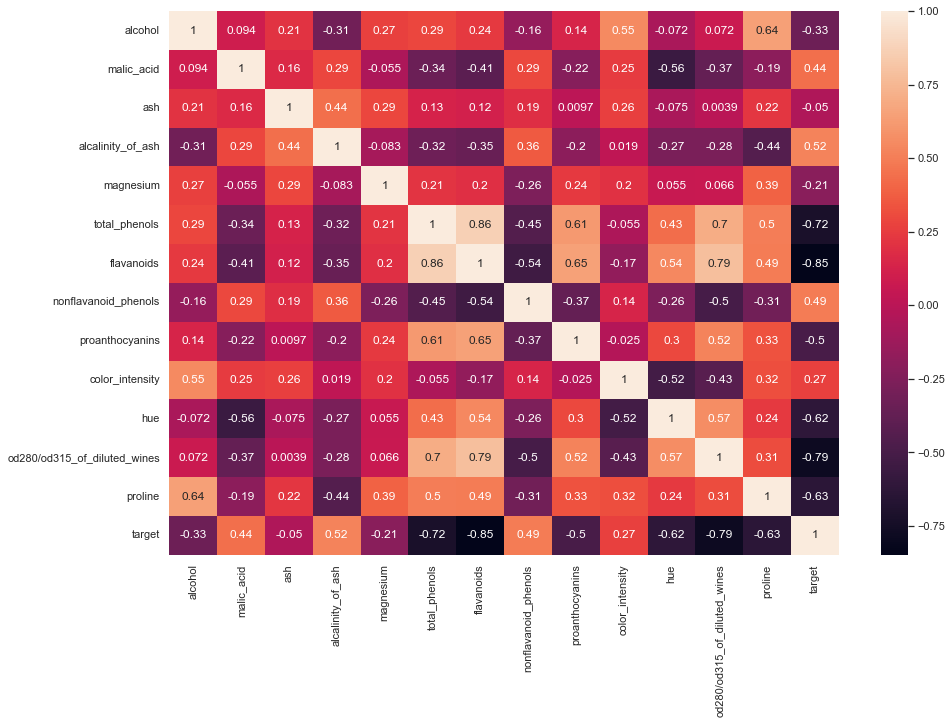

In [48]:
dataset = X
dataset['target'] = y
corr_matrix = dataset.corr()
temp = sns.heatmap(corr_matrix, annot = True)

In [49]:
X = X.drop(['target','ash','magnesium','color_intensity'], axis=1)
X.head()

,alcohol,malic_acid,alcalinity_of_ash,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,15.6,2.80,3.06,0.28,2.29,1.04,3.92,1065.0
1,13.20,1.78,11.2,2.65,2.76,0.26,1.28,1.05,3.40,1050.0
2,13.16,2.36,18.6,2.80,3.24,0.30,2.81,1.03,3.17,1185.0
3,14.37,1.95,16.8,3.85,3.49,0.24,2.18,0.86,3.45,1480.0
4,13.24,2.59,21.0,2.80,2.69,0.39,1.82,1.04,2.93,735.0


In [50]:
scaler = StandardScaler()

std_input_param = scaler.fit_transform(X)
std_input_param = pd.DataFrame(data = std_input_param)
std_input_param

pca = PCA()
principal_comps = pca.fit_transform(std_input_param)

pca_df = pd.DataFrame(data = principal_comps)
print("Principal Component Scores:")
pca_2comp_df = pca_df.iloc[:,0:2]
pca_2comp_df.columns = ['PC1','PC2']
pca_2comp_df

Principal Component Scores:


,PC1,PC2
0,3.124664,-0.958941
1,2.217459,-0.624122
2,2.569992,-0.444046
3,3.810608,-2.115537
4,0.815160,0.101873
...,...,...
173,-3.243333,-2.368206
174,-2.562071,-1.352423
175,-2.704579,-1.863070
176,-2.444490,-1.230971


In [51]:
explained_variance = pca.explained_variance_
cummulative_variance = np.cumsum(pca.explained_variance_ratio_)/np.sum(pca.explained_variance_ratio_)

print("Explained Variance:\n", explained_variance)
print()
print("Explained Variance Ratio:\n", pca.explained_variance_ratio_)
print()
print("Cummulative Variance:\n", cummulative_variance)
print()

singular_values = pca.singular_values_
print("Singular Variance:\n", singular_values)
print("\n")


Explained Variance:
 [4.6202497  1.61412751 1.0424746  0.74388888 0.53540981 0.50540212
 0.36518636 0.28174786 0.23743657 0.11057377]

Explained Variance Ratio:
 [0.45942932 0.16050594 0.1036618  0.07397097 0.05324019 0.05025628
 0.03631348 0.0280165  0.02361027 0.01099526]

Cummulative Variance:
 [0.45942932 0.61993526 0.72359706 0.79756803 0.85080822 0.9010645
 0.93737798 0.96539448 0.98900474 1.        ]

Singular Variance:
 [28.59692636 16.90267933 13.58374044 11.47468219  9.73486189  9.45812747
  8.03977522  7.06182494  6.48276734  4.42397534]




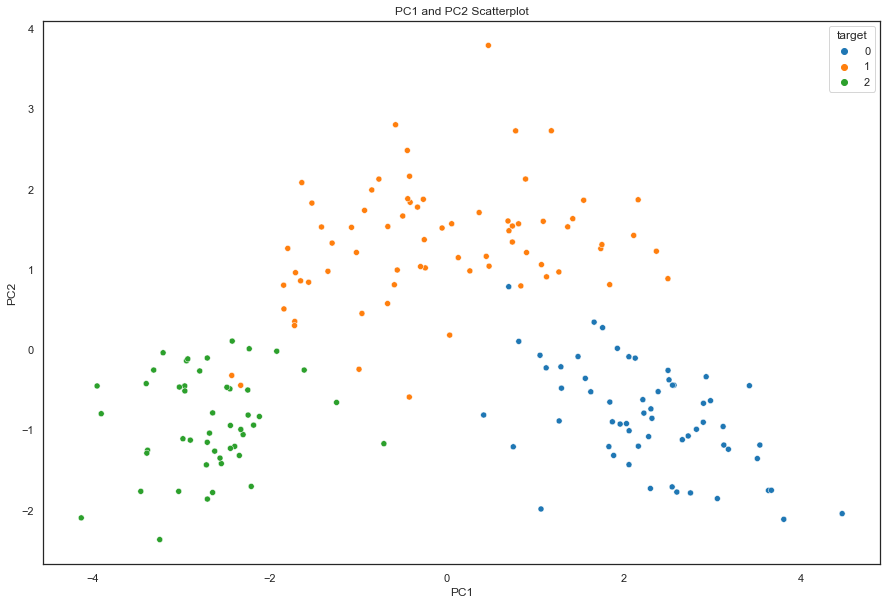

In [52]:
import warnings; warnings.simplefilter('ignore')
pca_2comp_df['target'] = y

ax = sns.scatterplot(data = pca_2comp_df, x="PC1", y="PC2", hue = 'target', palette = 'tab10')
temp = ax.set(title = "PC1 and PC2 Scatterplot")